<a href="https://colab.research.google.com/github/manjusreekc/EDA-Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading data
location = "/content/drive/MyDrive/Global Terrorism Analysis/Global Terrorism Data.csv"
df = pd.read_csv(location, encoding = 'ISO-8859-1',low_memory=False)

# **Inspection** **of** **Data** 

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [6]:
df.iyear.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [7]:
df.value_counts

<bound method DataFrame.value_counts of              eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ... 

In [8]:
df.shape

(181691, 135)

In [9]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Dtype  
---  ------              -----  
 0   eventid             int64  
 1   iyear               int64  
 2   imonth              int64  
 3   iday                int64  
 4   approxdate          object 
 5   extended            int64  
 6   resolution          object 
 7   country             int64  
 8   country_txt         object 
 9   region              int64  
 10  region_txt          object 
 11  provstate           object 
 12  city                object 
 13  latitude            float64
 14  longitude           float64
 15  specificity         float64
 16  vicinity            int64  
 17  location            object 
 18  summary             object 
 19  crit1               int64  
 20  crit2               int64  
 21  crit3               int64  
 22  doubtterr           float64
 23  alternative         float64
 24  alternative_txt     objec

#**Identifying the required columns**

First we create a new dataframe consisting of required columns to obtain the key findings.

In [10]:
columns = list(df.columns)
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [11]:
#Listing out the required columns
required_columns= ['eventid','iyear', 'imonth','country','country_txt',
 'region','region_txt','provstate','city','success',
 'attacktype1','attacktype1_txt','targtype1','targtype1_txt',
 'gname','weaptype1', 'weaptype1_txt',
 'nkill','nwound','nkillus']
print(required_columns)

['eventid', 'iyear', 'imonth', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'success', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'gname', 'weaptype1', 'weaptype1_txt', 'nkill', 'nwound', 'nkillus']


#**Creating a new dataframe with the selected columns**

In [12]:
df_= df[required_columns]

In [13]:
df_= df[required_columns]

In [14]:
gtd_df= df_.rename(columns = {'iyear': 'year', 'imonth': 'month', 'country':"country_id",'country_txt':'country_name','region':"region_id",'region_txt':"region_name",'attacktype1':'attacktype_id','attacktype1_txt':'attacktype','targtype1':'targtype_id', 'targtype1_txt':'targtype','weaptype1':"weapon_id",
       'weaptype1_txt':"weapon","nkill":"deaths","nwound":"injured"})

##**Replacing NaN values with 0**

In [15]:
gtd_df.fillna(0)

,eventid,year,month,country_id,country_name,region_id,region_name,provstate,city,success,attacktype_id,attacktype,targtype_id,targtype,gname,weapon_id,weapon,deaths,injured,nkillus
0,197000000001,1970,7,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,1,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,0.0,0.0
1,197000000002,1970,0,130,Mexico,1,North America,Federal,Mexico city,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,0.0,0.0
2,197001000001,1970,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,0.0,0.0
3,197001000002,1970,1,78,Greece,8,Western Europe,Attica,Athens,1,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,6,Explosives,0.0,0.0,0.0
4,197001000003,1970,1,101,Japan,4,East Asia,Fukouka,Fukouka,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,8,Incendiary,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,2,Armed Assault,4,Military,Al-Shabaab,5,Firearms,1.0,2.0,0.0
181687,201712310029,2017,12,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,1,3,Bombing/Explosion,4,Military,Muslim extremists,6,Explosives,2.0,7.0,0.0
181688,201712310030,2017,12,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,1,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),8,Incendiary,0.0,0.0,0.0
181689,201712310031,2017,12,92,India,6,South Asia,Manipur,Imphal,0,3,Bombing/Explosion,2,Government (General),Unknown,6,Explosives,0.0,0.0,0.0


We will analyze the dataset and try to obtain the following key findings:





*   Intensity of terror attacks over various regions
*   Success rate in fending off terrorists
*   Number of terrorist groups in various regions
*   Most frequently used weapons
*  Intensity of terror attacks over various countries
*   Which terrorist group is carrying out the most number of attacks
*   Types of Casualties
*   Civilian Deaths across Various Countries
*   Trend in the number of terror attacks over the past five decades
*   Most vulnerable target types
*   Wrath of the Terrorist Arsenal
*   Deadliest Terror Groups

#**Intensity of terrorist attack over various regions**

In [16]:
list(gtd_df.columns)

['eventid',
 'year',
 'month',
 'country_id',
 'country_name',
 'region_id',
 'region_name',
 'provstate',
 'city',
 'success',
 'attacktype_id',
 'attacktype',
 'targtype_id',
 'targtype',
 'gname',
 'weapon_id',
 'weapon',
 'deaths',
 'injured',
 'nkillus']

In [17]:
df1 = gtd_df.groupby('region_name')['region_id'].count().reset_index().sort_values("region_id", ascending=False)

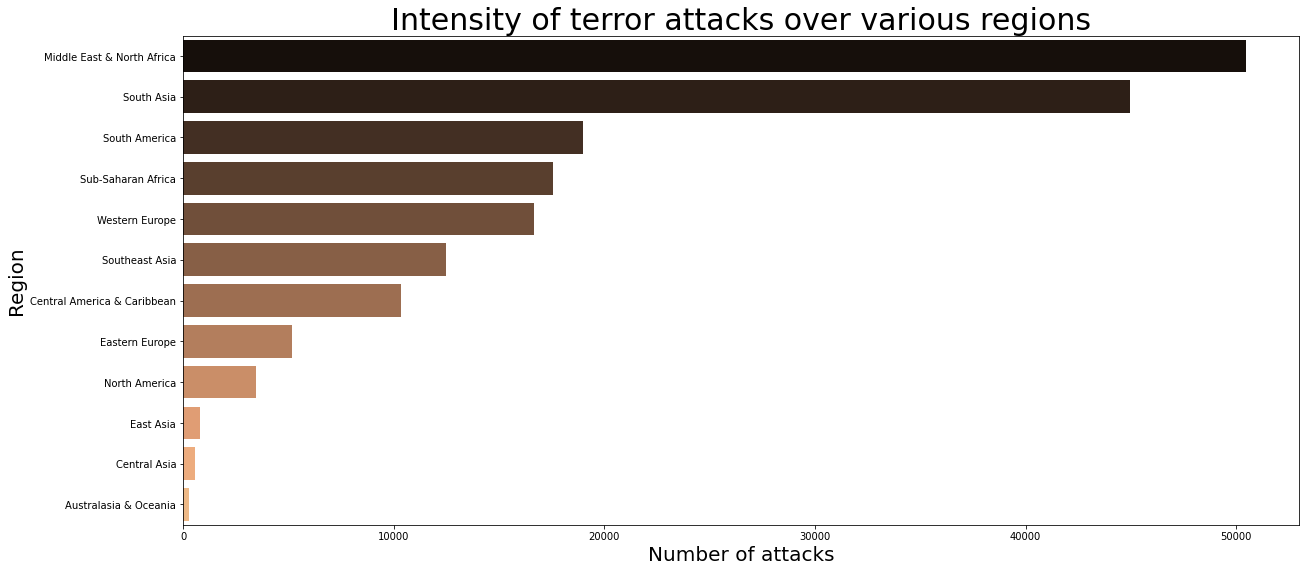

In [18]:
plt.rcParams["figure.figsize"]=(20,9)
sns.barplot(data = df1
            ,x = 'region_id'
            ,y = 'region_name', ci = None, palette = 'copper'
            )
plt.rcParams["figure.figsize"]=(30,7)
plt.title("Intensity of terror attacks over various regions",fontsize=30)
plt.ylabel("Region",fontsize=20)
plt.xlabel("Number of attacks",fontsize=20)
plt.show()

## **Inference**
##The regions surrounding the **Middle East** are the ones which are most affected by terrorism, hence these regions are to be concentrated by the counter terrorism committee in top priority. ##

#**Success rate in fending off terrorists**

In [19]:
#Creating a new dataframe with required columns for the given problem
df2=gtd_df[['country_id','country_name','success']]

In [20]:
df2.head()

,country_id,country_name,success
0,58,Dominican Republic,1
1,130,Mexico,1
2,160,Philippines,1
3,78,Greece,1
4,101,Japan,1


In [21]:
#Creating dataframes for success and failure of terrorist attacks in each country 
success=df2[df2['success']==1]
failure=df2[df2['success']==0]

In [22]:
success.head()

,country_id,country_name,success
0,58,Dominican Republic,1
1,130,Mexico,1
2,160,Philippines,1
3,78,Greece,1
4,101,Japan,1


In [23]:
failure=failure.rename(columns={'success':'failure'})
failure.head()

,country_id,country_name,failure
6,218,Uruguay,0
10,217,United States,0
23,217,United States,0
39,160,Philippines,0
43,217,United States,0


In [24]:
#Taking the count of success of terrorist attacks in each country
df_=success.groupby("country_name").agg({"success":"count"})

In [25]:
#Taking the count of failure of terrorist attacks in each country
df__=failure.groupby("country_name").agg({"failure":"count"})

In [26]:
df_.head()

,success
country_name,
Afghanistan,11141
Albania,64
Algeria,2561
Andorra,1
Angola,486


In [27]:
df__.head()


,failure
country_name,
Afghanistan,1590
Albania,16
Algeria,182
Angola,13
Argentina,101


In [28]:
df_.shape

(202, 1)

In [29]:
df__.shape

(174, 1)

In [30]:
#Merging the two dataframes success and failure using inner as the size differs in number of rows
merged_df=pd.merge(df_,df__,how='inner', left_on='country_name',right_on='country_name')

In [31]:
merged_df

,success,failure
country_name,,
Afghanistan,11141,1590
Albania,64,16
Algeria,2561,182
Angola,486,13
Argentina,714,101
...,...,...
Yemen,2837,510
Yugoslavia,179,24
Zaire,45,5


In [32]:
#Calculating success rate of the terrorist attack
merged_df["terrorist_success_rate"]=merged_df["success"]*100/(merged_df["success"]+merged_df["failure"])

In [33]:
#calculating defence success rate
merged_df["defence_success_rate"]=100-merged_df["terrorist_success_rate"]

In [34]:
merged_df.rename(columns={"success_rate":"terrorist_sucsess_rate"})

,success,failure,terrorist_success_rate,defence_success_rate
country_name,,,,
Afghanistan,11141,1590,87.510800,12.489200
Albania,64,16,80.000000,20.000000
Algeria,2561,182,93.364929,6.635071
Angola,486,13,97.394790,2.605210
Argentina,714,101,87.607362,12.392638
...,...,...,...,...
Yemen,2837,510,84.762474,15.237526
Yugoslavia,179,24,88.177340,11.822660
Zaire,45,5,90.000000,10.000000


In [35]:
merged_df.reset_index(inplace=True)

In [36]:
merged_df.sort_values(by="defence_success_rate",ascending=False,inplace=True)

In [37]:
#Checking the strogest 5 countries based on defence 
merged_df.head()

,country_name,success,failure,terrorist_success_rate,defence_success_rate
50,Gambia,1,2,33.333333,66.666667
69,Ireland,139,168,45.276873,54.723127
154,Turkmenistan,1,1,50.000000,50.000000
106,New Zealand,11,9,55.000000,45.000000
163,Vietnam,7,5,58.333333,41.666667


In [38]:
#Checking the weekest 5 countries based on defence
merged_df.tail()

,country_name,success,failure,terrorist_success_rate,defence_success_rate
102,Namibia,147,4,97.350993,2.649007
3,Angola,486,13,97.394790,2.605210
43,El Salvador,5227,93,98.251880,1.748120
128,Senegal,116,2,98.305085,1.694915
107,Nicaragua,1939,31,98.426396,1.573604


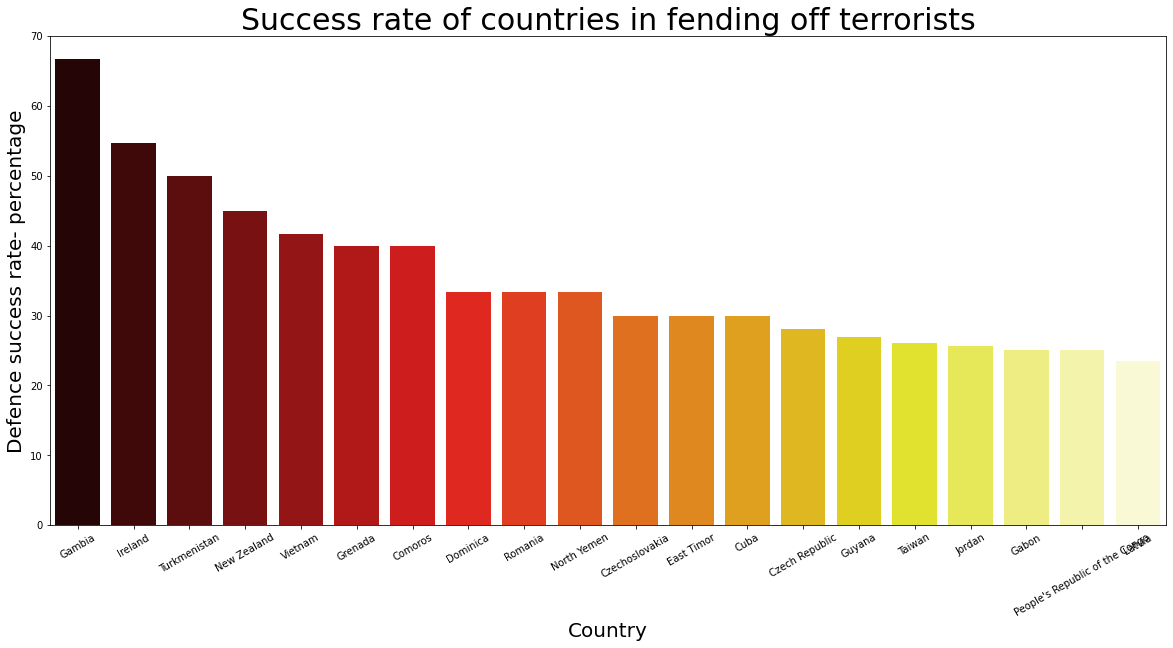

In [39]:
plt.rcParams["figure.figsize"]=(20,9)
sns.barplot(data = merged_df.head(20)
            ,x = 'country_name'
            ,y = 'defence_success_rate',palette ='hot'
            ).tick_params(axis='x', rotation=30)

plt.title("Success rate of countries in fending off terrorists",fontsize=30)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Defence success rate- percentage",fontsize=20)
plt.show()

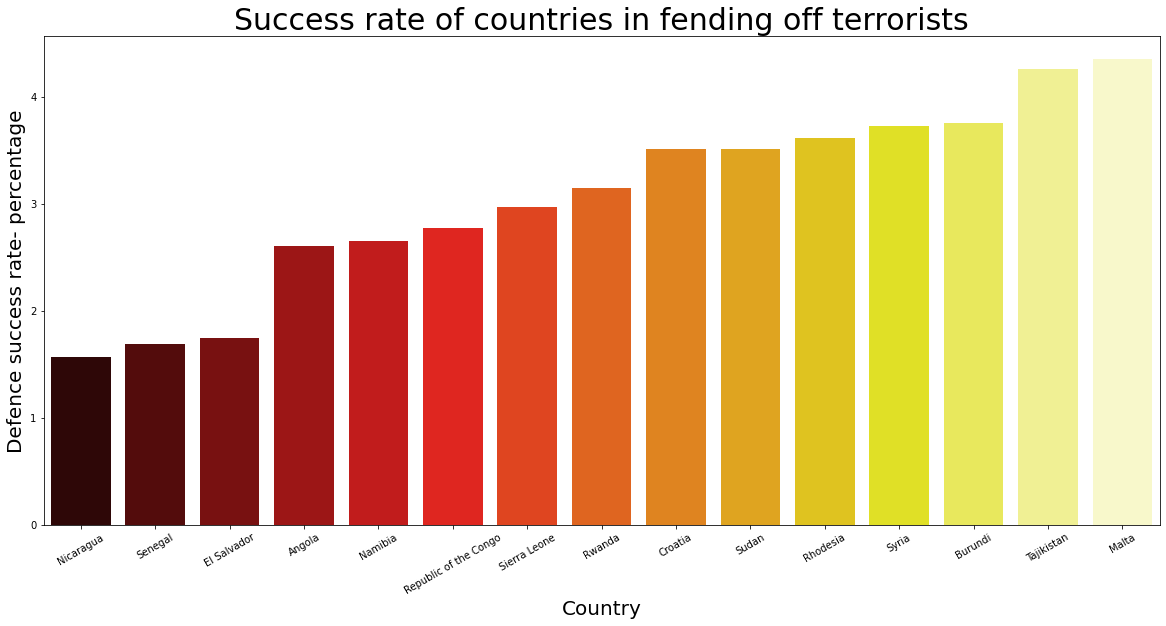

In [40]:
plt.rcParams["figure.figsize"]=(20,9)
sns.barplot(data = merged_df.tail(15).sort_values(by = 'defence_success_rate', ascending = True)
            ,x = 'country_name'
            ,y = 'defence_success_rate', palette ='hot'
            ).tick_params(axis='x', rotation=30)

plt.title("Success rate of countries in fending off terrorists",fontsize=30)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Defence success rate- percentage",fontsize=20)
plt.show()

##**Inference**


*   Gambia has the highest success rate in fending off the terrorists
*  Namibia,Angola,El Salvador, Senegal, Nicaragua are the weakest countries in terms of defense against terrorism.

#**Number of terrorist groups in various regions**

In [41]:
gtd_df

,eventid,year,month,country_id,country_name,region_id,region_name,provstate,city,success,attacktype_id,attacktype,targtype_id,targtype,gname,weapon_id,weapon,deaths,injured,nkillus
0,197000000001,1970,7,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,0.0,NaN
1,197000000002,1970,0,130,Mexico,1,North America,Federal,Mexico city,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,0.0,NaN
2,197001000001,1970,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,0.0,NaN
3,197001000002,1970,1,78,Greece,8,Western Europe,Attica,Athens,1,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,6,Explosives,NaN,NaN,NaN
4,197001000003,1970,1,101,Japan,4,East Asia,Fukouka,Fukouka,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,8,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,2,Armed Assault,4,Military,Al-Shabaab,5,Firearms,1.0,2.0,0.0
181687,201712310029,2017,12,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,1,3,Bombing/Explosion,4,Military,Muslim extremists,6,Explosives,2.0,7.0,0.0
181688,201712310030,2017,12,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,1,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),8,Incendiary,0.0,0.0,0.0
181689,201712310031,2017,12,92,India,6,South Asia,Manipur,Imphal,0,3,Bombing/Explosion,2,Government (General),Unknown,6,Explosives,0.0,0.0,0.0


In [42]:
df3=gtd_df.groupby("region_name").agg({"gname":"nunique"}).sort_values(by="gname",ascending=False)
df3.rename(columns={"gname":"number_of_groups"},inplace=True)

In [43]:
df3.reset_index(inplace=True)

In [44]:
df3

,region_name,number_of_groups
0,Western Europe,866
1,Middle East & North Africa,739
2,South Asia,591
3,Sub-Saharan Africa,492
4,South America,363
5,North America,300
6,Central America & Caribbean,217
7,Southeast Asia,215
8,Eastern Europe,157
9,East Asia,82


Text(0, 0.5, 'Regions')

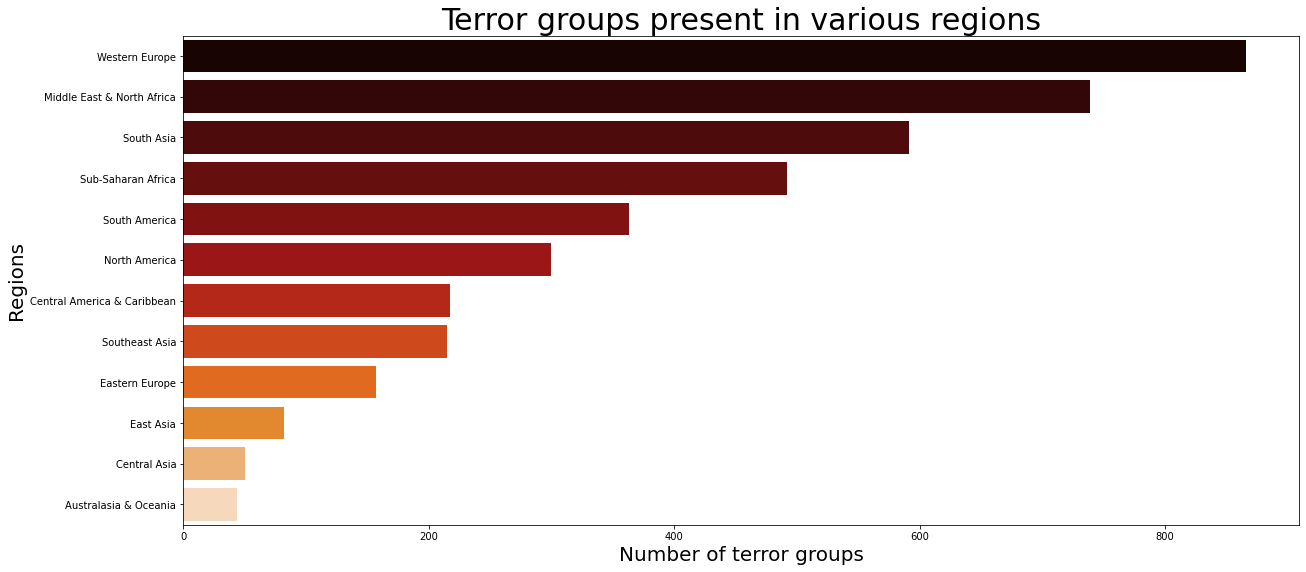

In [45]:
sns.barplot(data = df3, x = 'number_of_groups', y = 'region_name', ci = None, palette = 'gist_heat')
sns.color_palette("mako", as_cmap=True)
plt.title('Terror groups present in various regions', fontsize = 30)
plt.xlabel('Number of terror groups', fontsize = 20)
plt.ylabel('Regions', fontsize = 20)

##**Inference**
##**Western Europe, Middle East , North Africa, South Africa , Sub-Saharan Africa  and North America** are the regions which has the highest number of terrorist groups.

#**Most frequently used weapons**

In [46]:
#obtaining dataframe containing weapon type and count of it being used
weapon=gtd_df["weapon"].value_counts().reset_index().rename(columns={"index":"weapon_type","weapon":"Usage"})

In [47]:
weapon.sort_values(by="Usage",ascending=False,inplace=True)

In [48]:
weapon.head()

,weapon_type,Usage
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655


In [49]:
weapon.tail()

,weapon_type,Usage
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35
10,Fake Weapons,33
11,Radiological,14


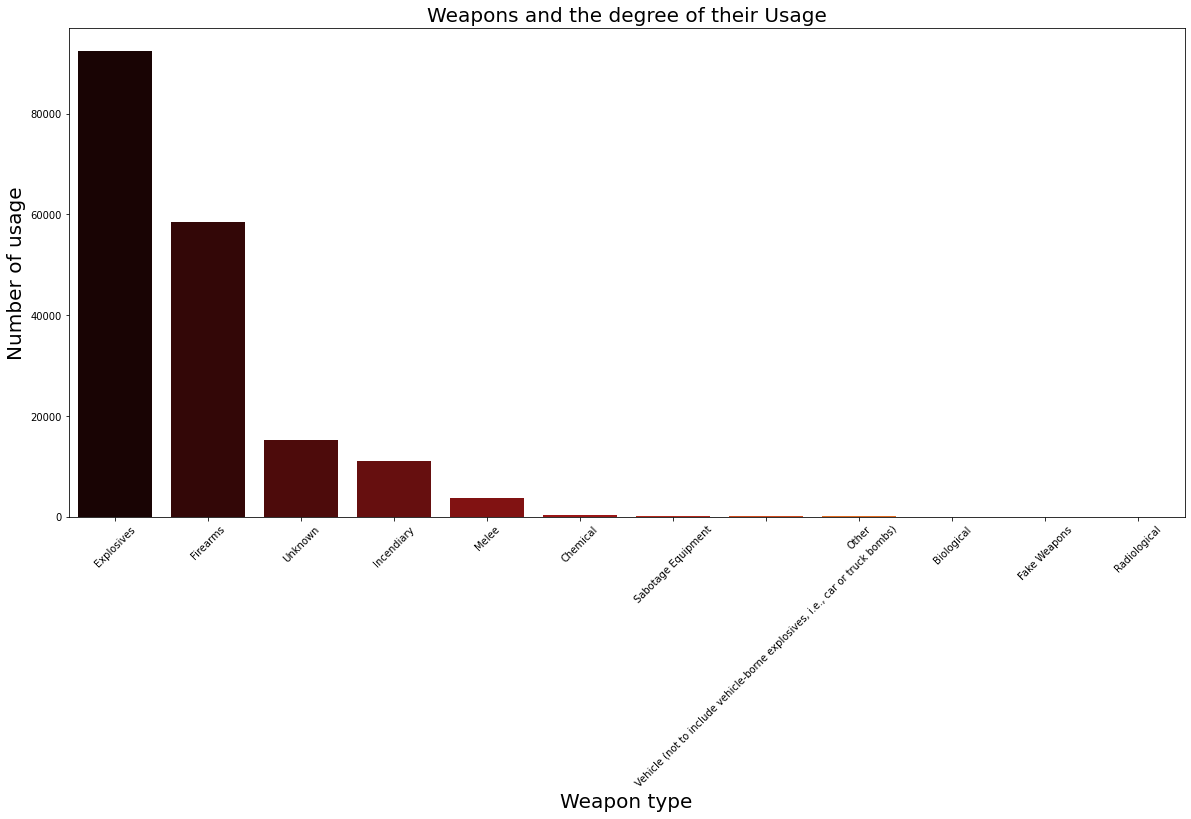

In [50]:
#plotting graph
sns.barplot(data = weapon.head(25), x = 'weapon_type', y = 'Usage', palette = 'gist_heat').tick_params(axis='x', rotation=45)
plt.title('Weapons and the degree of their Usage', fontsize = 20)
plt.xlabel('Weapon type', fontsize = 20)
plt.ylabel('Number of usage', fontsize = 20)
plt.show()

##**Inference**
Most frequently used weapon type is explosives whereas radiological weapons are used the least

#**Intensity of terror attacks over various countries**

In [51]:
#calculating number of attacks in each country
country = gtd_df.groupby('country_name')['country_id'].count().reset_index().rename(columns = {'country_id':'number of attacks'})
country.sort_values(by="number of attacks",ascending=False,inplace=True)

In [52]:
country.head()

,country_name,number of attacks
84,Iraq,24636
134,Pakistan,14368
0,Afghanistan,12731
80,India,11960
35,Colombia,8306


Text(0, 0.5, 'Number of attacks')

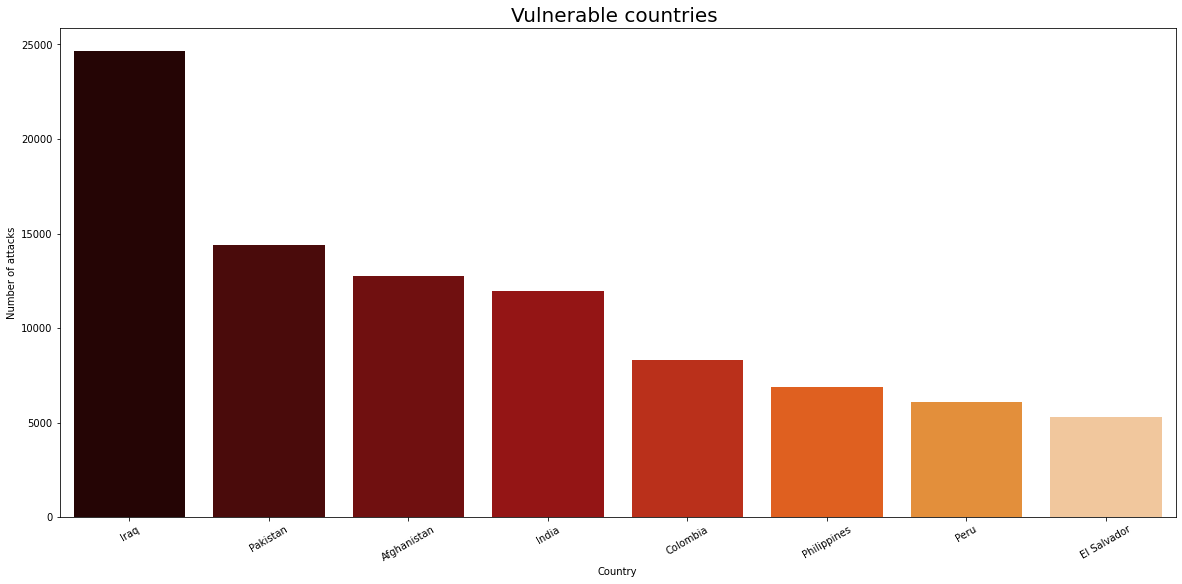

In [53]:
sns.barplot(data = country.head(8), x = 'country_name', y = 'number of attacks', ci = None, palette = 'gist_heat').tick_params(axis='x', rotation=30)
sns.color_palette("mako", as_cmap=True)
plt.title("Vulnerable countries ", fontsize = 20)
plt.xlabel("Country", fontsize = 10)
plt.ylabel("Number of attacks", fontsize = 10)

##**Inference**
Iraq, Pakistan & Afghanistan are the countries that faced highest number of terrorist attacks


#**The terrorist group which is carrying out the most number of attacks**

In [54]:
df4=gtd_df.groupby("gname").agg({'gname':'count'}).rename(columns={"gname":"num_of_attacks"}).reset_index()
df4.head()

,gname,num_of_attacks
0,1 May,10
1,14 K Triad,4
2,14 March Coalition,1
3,14th of December Command,3
4,15th of September Liberation Legion,1


In [55]:
df4.sort_values(by='num_of_attacks',ascending=False,inplace=True)

In [56]:
df4.head()

,gname,num_of_attacks
3408,Unknown,82782
3138,Taliban,7478
1535,Islamic State of Iraq and the Levant (ISIL),5613
2948,Shining Path (SL),4555
1120,Farabundo Marti National Liberation Front (FMLN),3351


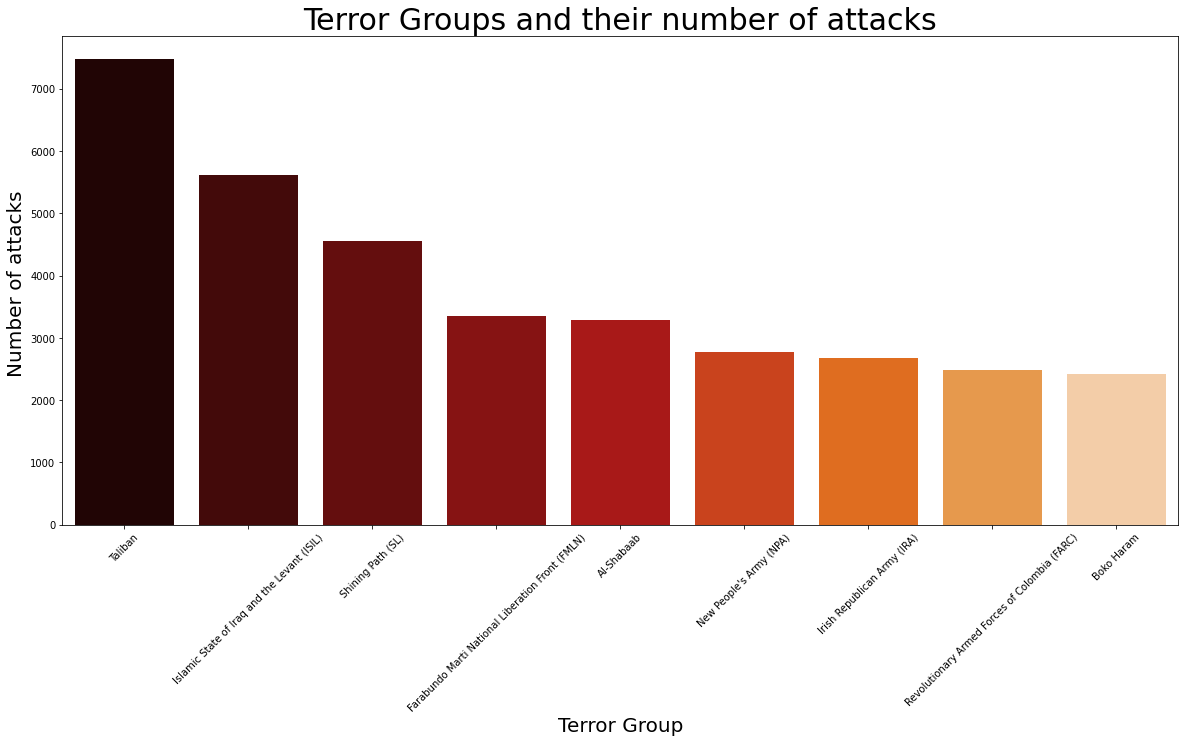

In [57]:
sns.barplot(data = df4[1:10], x = 'gname', y = 'num_of_attacks', palette = 'gist_heat').tick_params(axis='x', rotation=45)
plt.rcParams["figure.figsize"]=(25,10)
plt.title('Terror Groups and their number of attacks', fontsize = 30)
plt.xlabel('Terror Group', fontsize = 20)
plt.ylabel('Number of attacks ', fontsize = 20)
plt.show()

#**Inference:**
 The Taliban and ISIL carried out more attacks

#**Types of Casualties**

In [58]:
gtd_df.columns

Index(['eventid', 'year', 'month', 'country_id', 'country_name', 'region_id',
       'region_name', 'provstate', 'city', 'success', 'attacktype_id',
       'attacktype', 'targtype_id', 'targtype', 'gname', 'weapon_id', 'weapon',
       'deaths', 'injured', 'nkillus'],
      dtype='object')

In [59]:
df5 = gtd_df.groupby('year').agg({'eventid':"count",'deaths':'sum',"injured":'sum'})

In [60]:
df5.rename(columns={'eventid':"num_of_attacks",'deaths':"num_of_civilians_killed","injured":"num_of_civilians_wounded"},inplace=True)

In [61]:
df5.reset_index(inplace=True)

In [62]:
df5.head()

,year,num_of_attacks,num_of_civilians_killed,num_of_civilians_wounded
0,1970,651,174.0,212.0
1,1971,471,173.0,82.0
2,1972,568,566.0,409.0
3,1973,473,370.0,495.0
4,1974,581,539.0,865.0


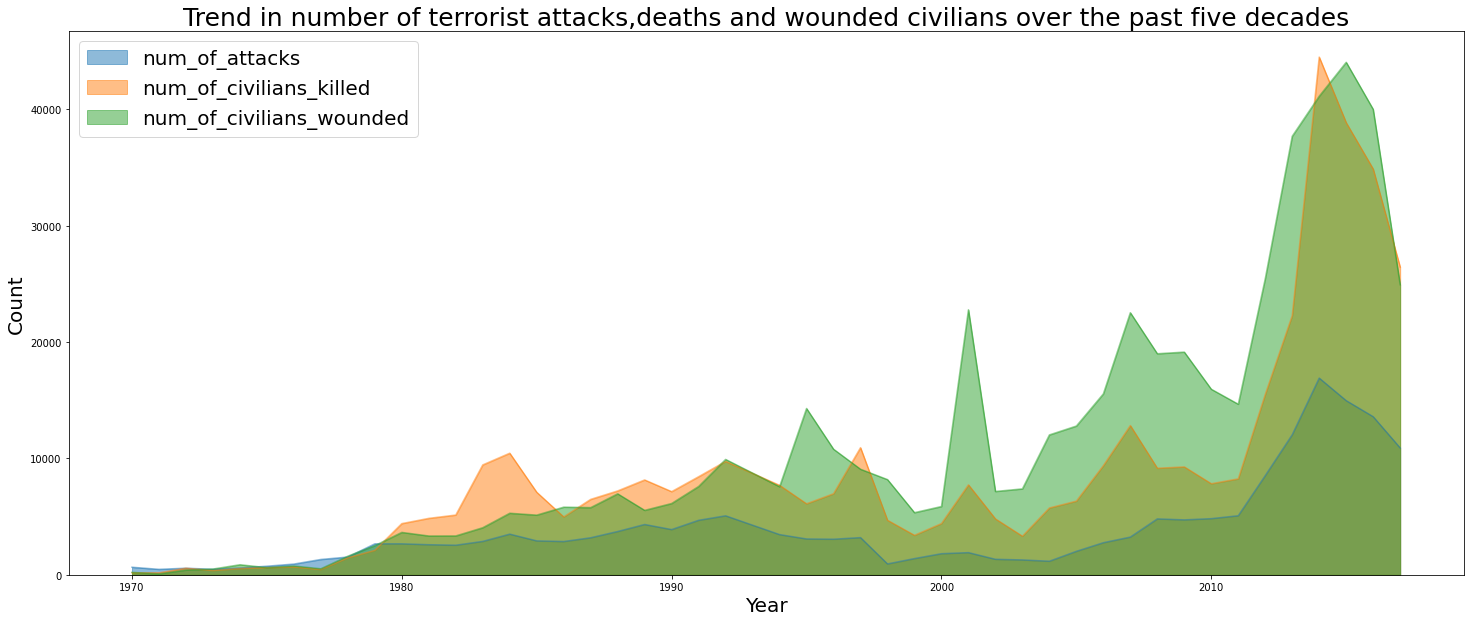

In [63]:
plt.rcParams["figure.figsize"]=(25,10)
df5.plot(x="year",y=['num_of_attacks','num_of_civilians_killed','num_of_civilians_wounded'],kind="area",stacked=False).legend(fontsize=20)
plt.title("Trend in number of terrorist attacks,deaths and wounded civilians over the past five decades",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Count",fontsize=20)

plt.show()